In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import norm, uniform
import lmdiag
import statsmodels.api as sm

In [2]:
def ols_sim(n, u_sd):  # n=標本の大きさ，　u_sd=誤差項の標準偏差
    
    x = uniform.rvs(1, 10, size=n)  # 説明変数
    u = norm.rvs(scale=u_sd, size=n)  # 誤差項
    y = 1.0 + 0.5*x + u               # 被説明変数
    
    df = pd.DataFrame({'Y':y, 'X':x})  # DataFrame
    
    res = ols(formula='Y ~ X', data=df).fit()  # OLSの計算
    u_standardized = res.get_influence().resid_studentized_internal  # 標準化残差
    
    return x, y, res.fittedvalues, res.resid, u_standardized, res.rsquared  # 返り値の設定

In [3]:
# R^2が高いケース
x_high, y_high, y_fit_high, resid_high, resid_st_high, r2_high = ols_sim(50, 0.5)

# R^2が低いケース
x_low, y_low, y_fit_low, resid_low, resid_st_low, r2_low = ols_sim(50, 1.5)

In [4]:
print(f'決定係数が高いケース: {r2_high:.3f}\n決定係数が高いケース: {r2_low:.3f}')

決定係数が高いケース: 0.929
決定係数が高いケース: 0.574


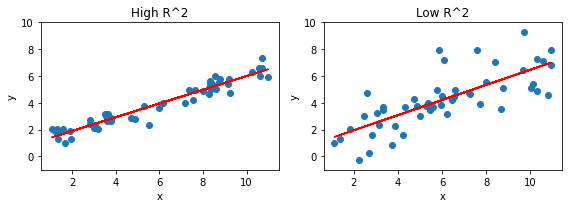

In [5]:
plt.figure(figsize=(8,3))  # figsizeは左右２つの図を合わせた大きさ

# 左の図
plt.subplot(121)
plt.scatter(x_high,y_high)  # 散布図
plt.plot(x_high, y_fit_high,color='red')  # 回帰線
plt.ylim(-1,10)  # 縦軸の表示幅を設定
plt.xlabel('x')  # 横軸のラベル
plt.ylabel('y')  # 縦軸のラベル
plt.title('High R^2')  # タイトル

# 右の図
plt.subplot(122)
plt.scatter(x_low,y_low)
plt.plot(x_low, y_fit_low, color='red')
plt.ylim(-1,10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Low R^2')

plt.tight_layout();  # 左右の間に余裕も持たせる

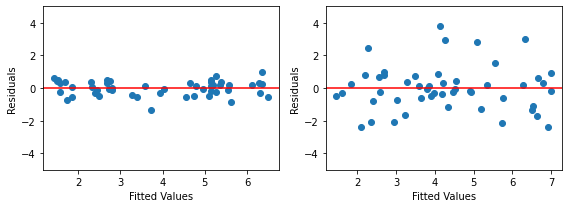

In [6]:
plt.figure(figsize=(8,3))

# 左の図
plt.subplot(121)
plt.scatter(y_fit_high,resid_high)
plt.axhline(y=0, color='red')  # 縦軸の値が0での平行線
plt.ylim(-5,5)  # 縦軸の表示幅を指定
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 右の図
plt.subplot(122)
plt.scatter(y_fit_low,resid_low)
plt.axhline(y=0, color='red')
plt.ylim(-5,5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout();

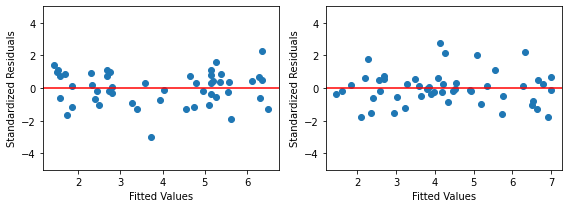

In [7]:
plt.figure(figsize=(8,3))

# 左の図
plt.subplot(121)
plt.scatter(y_fit_high,resid_st_high)
plt.axhline(y=0, color='red')  # 縦軸の値が0での平行線
plt.ylim(-5,5)  # 縦軸の表示幅を指定
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')

# 右の図
plt.subplot(122)
plt.scatter(y_fit_low,resid_st_low)
plt.axhline(y=0, color='red')
plt.ylim(-5,5)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')

plt.tight_layout();

In [8]:
def resid_ideal(n, u_sd):
    
    xx = list(range(n))  # 0から始まるｎ個の整数のリスト
    u = norm.rvs(scale=u_sd, size=n)   # 正規分布に従うn個の「残差」
    
    return plt.scatter(xx,u), \
           plt.axhline(y=0,color='red'), \
           plt.xlabel('n'), \
           plt.ylabel('Residuals'), \
           plt.title('Ideal Residuals')

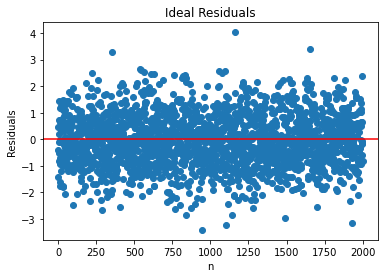

In [9]:
resid_ideal(2000, 1);

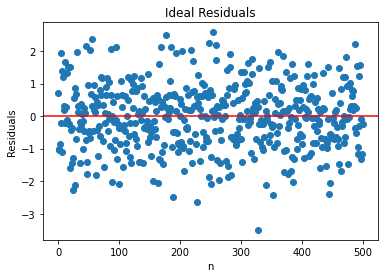

In [10]:
resid_ideal(500, 1);

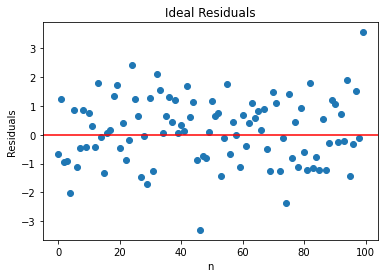

In [11]:
resid_ideal(100, 1);

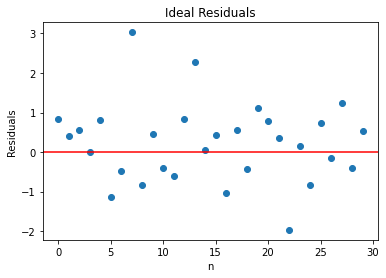

In [12]:
resid_ideal(30, 1);

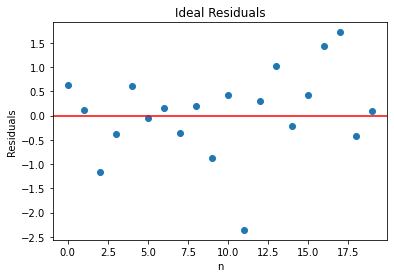

In [13]:
resid_ideal(20, 1);

In [14]:
n = 50  # 標本の大きさ

x = norm.rvs(loc=4, scale=1, size=n)  # 説明変数
u = norm.rvs(size=n)  # 誤差項（標準正規分布）
y = 1 + 0.5*x + u  # 説明変数

df_diag = pd.DataFrame({'Y':y, 'X':x})  # DataFrameの作成

res_diag = ols(formula='Y ~ X', data=df_diag).fit()  # OLS推定

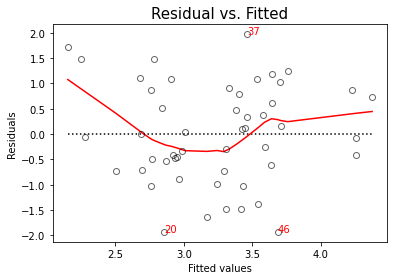

In [15]:
lmdiag.resid_fit(res_diag)
pass

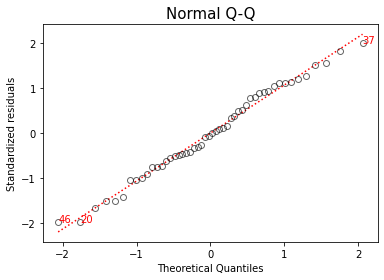

In [16]:
lmdiag.q_q(res_diag)
pass

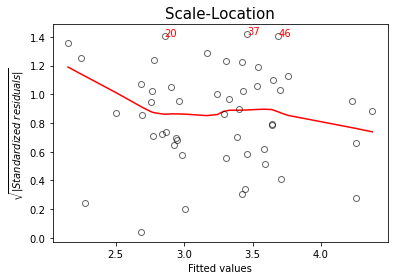

In [17]:
lmdiag.scale_loc(res_diag)
pass

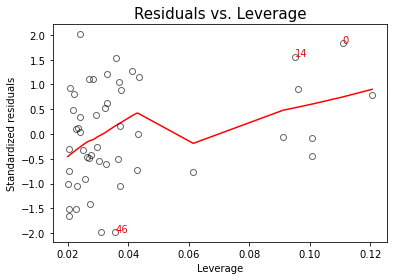

In [18]:
lmdiag.resid_lev(res_diag)
pass

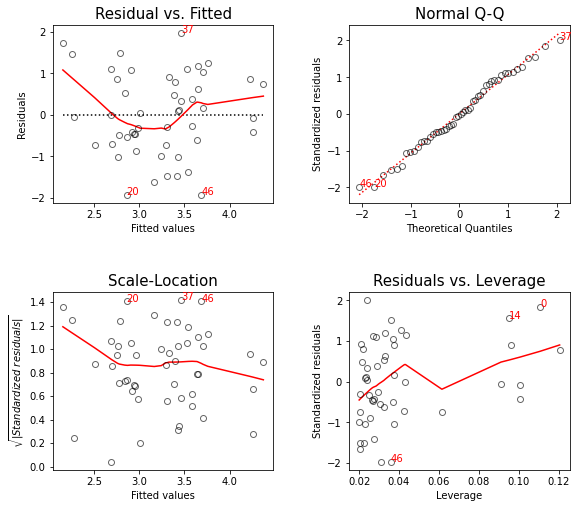

In [19]:
plt.figure(figsize=(8,7))
lmdiag.plot(res_diag)
pass

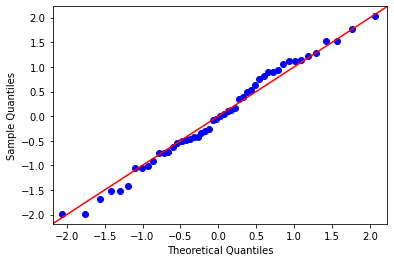

In [20]:
sm.qqplot(res_diag.resid, fit=True, line='45')
pass

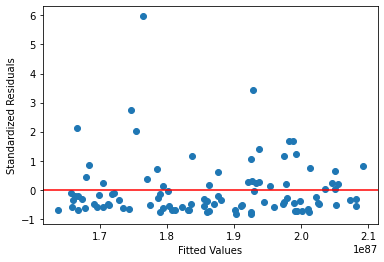

In [21]:
n = 100  # 標本の大きさ

x = uniform.rvs(1, 10, size=n)  # 説明変数
u = norm.rvs(scale=1, size=n)  # 誤差項
y = np.exp(200.0 + .1*x + u)   # 被説明変数

df = pd.DataFrame({'Y':y, 'X':x})  # DataFrame

res = ols(formula='Y ~ X', data=df).fit()  # OLSの計算
resid_std = res.get_influence().resid_studentized_internal  # 標準化残差

plt.scatter(res.fittedvalues,resid_std)  # 散布図
plt.axhline(y=0, color='red')          # 赤い平行線
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
pass

/Users/Tetsu/anaconda3/envs/latest/lib/python3.8/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/Tetsu/anaconda3/envs/latest/lib/python3.8/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/Tetsu/anaconda3/envs/latest/lib/python3.8/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


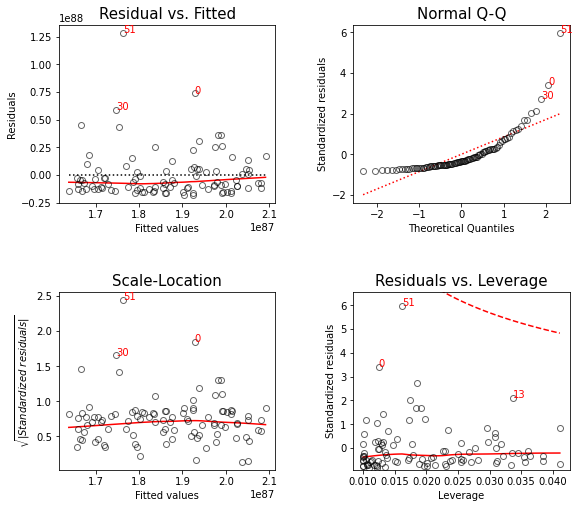

In [22]:
plt.figure(figsize=(8,7))
lmdiag.plot(res)
pass

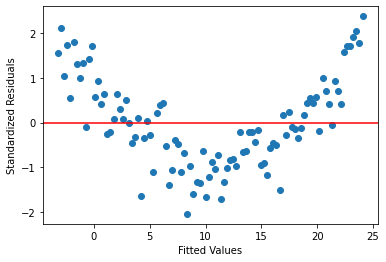

In [23]:
n = 100
x = np.linspace(0,16,n)
x2 = x**2
u = norm.rvs(scale=1, size=n)
y = 1.0 + 0.1*x +0.1*x2+ u
df = pd.DataFrame({'Y':y, 'X':x})

res = ols(formula='Y ~ X', data=df).fit()
resid_std = res.get_influence().resid_studentized_internal

plt.scatter(res.fittedvalues,resid_std)
plt.axhline(y=0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
pass

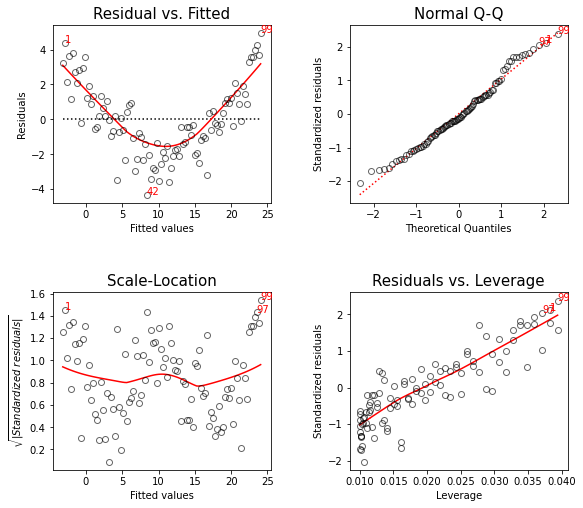

In [24]:
plt.figure(figsize=(8,7))
lmdiag.plot(res)
pass

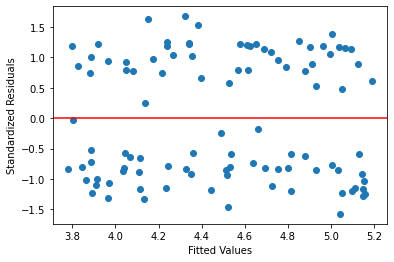

In [25]:
n = 100

b0 = np.random.choice([1,7], n, p=[0.5,0.5])
x = uniform.rvs(0,10,size=n)
u = norm.rvs(scale=1, size=n)
y = b0 + 0.1*x + u

df = pd.DataFrame({'Y':y, 'X':x})

res = ols(formula='Y ~ X', data=df).fit()
resid_std = res.get_influence().resid_studentized_internal

plt.scatter(res.fittedvalues,resid_std)
plt.axhline(y=0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
pass

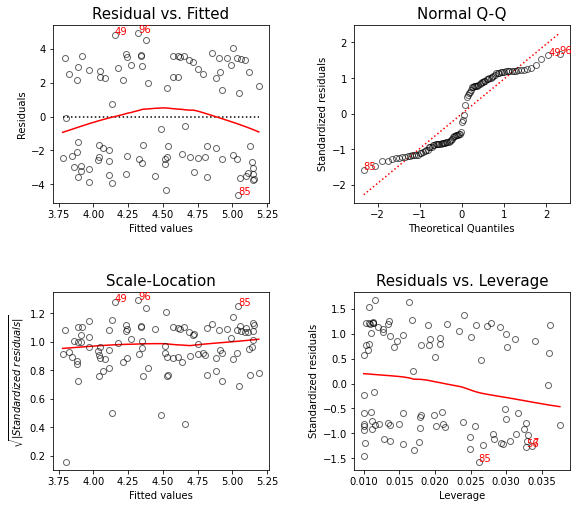

In [26]:
plt.figure(figsize=(8,7))
lmdiag.plot(res)
pass

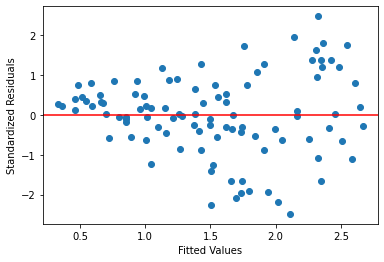

In [27]:
n = 100
x = uniform.rvs(0,10,size=n)
u = norm.rvs(scale=1, size=n)
y = 1 + 0.1*x + x**0.6*u
df = pd.DataFrame({'Y':y, 'X':x})

res = ols(formula='Y ~ X', data=df).fit()
resid_std = res.get_influence().resid_studentized_internal

plt.scatter(res.fittedvalues,resid_std)
plt.axhline(y=0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
pass

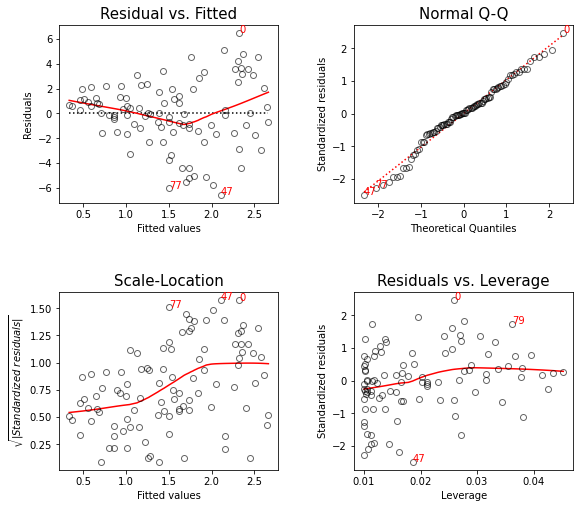

In [28]:
plt.figure(figsize=(8,7))
lmdiag.plot(res)
pass

In [29]:
np.random.seed(123)

n = 20
x = norm.rvs(loc=20, scale=3, size=n)
u = norm.rvs(size=n)
y = 5 + 0.5*x + u

# 外れ値を追加する
x = np.append(x, 30)
y = np.append(y, 10)
df_cd = pd.DataFrame({'Y':y, 'X':x})

# 外れ値がない場合のOLS
res_no = ols(formula='Y ~ X', data=df_cd.loc[0:19,:]).fit()

# 外れ値がある場合のOLS
res_cd = ols(formula='Y ~ X', data=df_cd).fit()

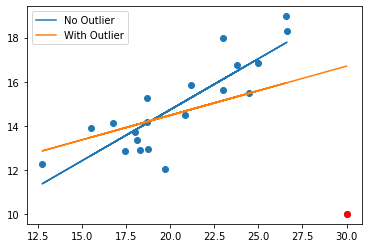

In [30]:
plt.scatter(x,y)
plt.scatter(30,10, color='red')  # 外れ値
plt.plot(x[:20],res_no.fittedvalues, label='No Outlier')
plt.plot(x,res_cd.fittedvalues, label='With Outlier')
plt.legend()
pass

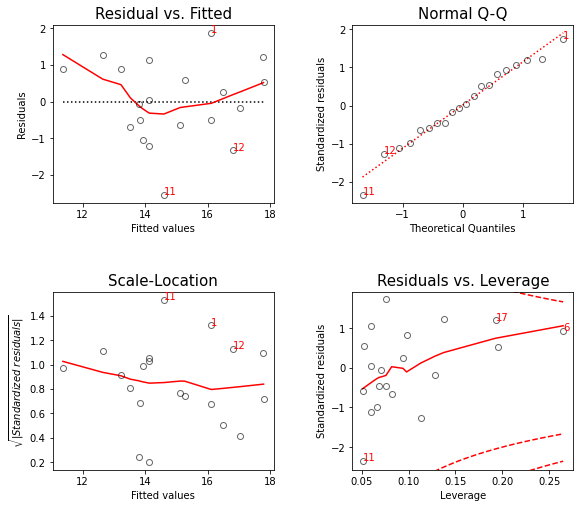

In [31]:
plt.figure(figsize=(8,7))
lmdiag.plot(res_no)
pass

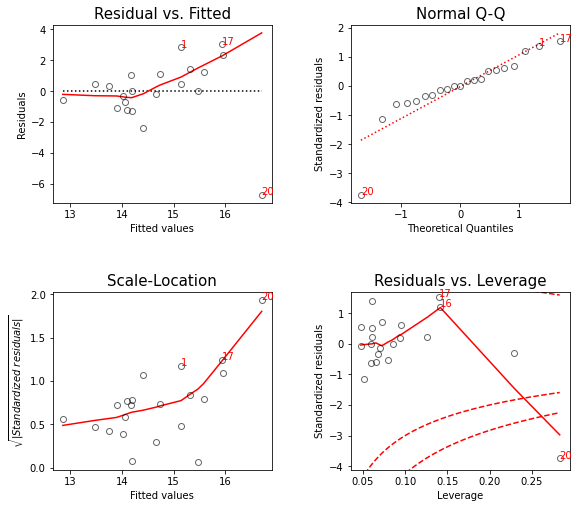

In [32]:
plt.figure(figsize=(8,7))
lmdiag.plot(res_cd)
pass

In [33]:
df_cd.iloc[20,:]

Y    10.0
X    30.0
Name: 20, dtype: float64